![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Unsupervised learning intro

#### Instructions 


It's the moment to perform clustering on the songs you collected. Remember that the ultimate goal of this little project is to improve the recommendations of artists. Clustering the songs will allow the recommendation system to limit the scope of the recommendations to only songs that belong to the same cluster - songs with similar audio features.

The experiments you did with the `Spotify` API and the Billboard web scraping will allow you to create a pipeline such that when the user enters a song, you:

1. Check whether or not the song is in the Billboard Hot 200.
2. Collect the audio features from the `Spotify` API.

After that, you want to send the `Spotify` audio features of the submitted song to the clustering model, which should return a cluster number.

We want to have as many songs as possible to create the clustering model, so we will add the songs you collected to a bigger dataset available on Kaggle containing 160 thousand songs.

In [2]:
import spotipy as sp
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.metrics import pairwise_distances_argmin_min

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
import os
%matplotlib inline

#pip install plotly==5.6.0
#pip install yellowbrick

In [3]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="84acfa90a4b040b288565c9043c891fc",
                                                          client_secret="b2096cde0fb74a10a980ebcd67843f8a"))

In [4]:
songs_data =pd.read_csv('./12M_songs_tracks_features.csv')

Download the dataset from: https://www.kaggle.com/rodolfofigueroa/spotify-12m-songs

In [5]:
songs_data.shape

(1204025, 24)

## Clustering algorithm KMeans

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [7]:
#x = genre_data.select_dtypes(np.number) DOESN'T WORK IF THERE ARE NaNs
X=songs_data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

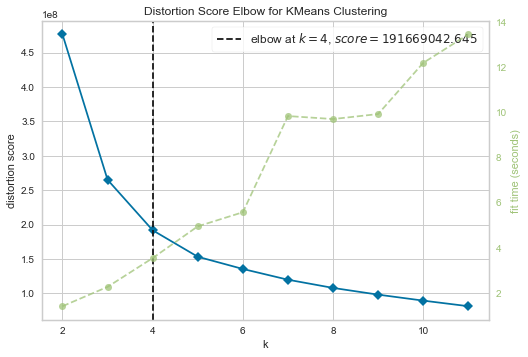

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [9]:
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=4, random_state=42))])

In [10]:
cluster_pipeline.fit(X)
songs_data['cluster'] = cluster_pipeline.predict(X)

In [11]:
songs_data.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date,cluster
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02,1
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02,1
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02,3
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02,2
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02,1


In [12]:
from sklearn.decomposition import PCA
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = songs_data['name']
projection['cluster'] = songs_data['cluster']

pip install -U kaleido

In [13]:
import plotly.express as px
fig = px.scatter(projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
#fig.show()
fig.write_image("fig1.jpeg")

Populating the interactive namespace from numpy and matplotlib


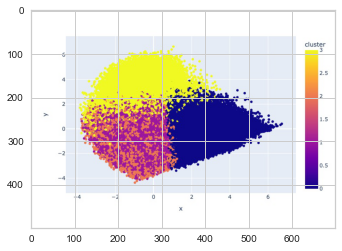

In [17]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('fig1.jpeg')
imgplot = plt.imshow(img)
plt.show()

In [14]:
songs_data_grouped=songs_data.groupby(['cluster', 'artists'], as_index=False).count().sort_values(['cluster', 'key'], ascending=[True, False])[['artists', 'cluster', 'key']].reset_index(drop=True)
songs_data_grouped

,artists,cluster,key
0,"[""Dan Gibson's Solitudes""]",0,929
1,['The City of Prague Philharmonic Orchestra'],0,899
2,['Various Artists'],0,866
3,['Vitamin String Quartet'],0,773
4,"['Frédéric Chopin', 'Idil Biret']",0,508
...,...,...,...
247816,['Филипп Киркоров feat. Lou Bega'],3,1
247817,['Филипп Киркоров feat. Анастасия Стоцкая'],3,1
247818,['左小祖咒'],3,1
247819,['非／密閉空間'],3,1


## Song Recommender

In [1]:
song_name = input('Choose a song: ')
#'Californication'
results = sp.search(q=f'track:{song_name}', limit=1)
track_id = results['tracks']['items'][0]['id']
audio_features = sp.audio_features(track_id)

df_ = pd.DataFrame(audio_features)
new_features = df_[X.columns]
#display(new_features)
#display(X)

scaled_x=cluster_pipeline['scaler'].transform(new_features)
cluster = cluster_pipeline.predict(new_features)

filtered_df = songs_data[songs_data['cluster'] == cluster[0]][X.columns]
closest, _ = pairwise_distances_argmin_min(scaled_x, filtered_df)
print(closest)

Choose a song: Californication


NameError: name 'sp' is not defined

In [16]:
songs_data.loc[closest[0]]['name'], songs_data.loc[closest[0]]['artists']

('Cowgirl In the Sand', "['Josie Cotton']")